# Risk Parity

### Background



### Summary


### Data Dictionary




#### Gold
Gold has long been considered a "safe-haven" asset, often retaining value or even appreciating during times of economic uncertainty, inflation, or market volatility. Its value doesn't typically move in direct correlation with stock or bond markets, making it a useful tool for diversification and risk management. In a risk parity portfolio, gold can serve to balance out the risks associated with more volatile assets, providing stability and preserving capital during downturns.

#### Bitcoin
Bitcoin, on the other hand, represents a more volatile and relatively newer asset class often categorized as "digital gold" or a speculative investment. However, its distinct market behavior, potential for high returns, and increasing acceptance as a legitimate investment option allow it to serve a unique role in a risk parity strategy. Bitcoin's low correlation with traditional asset classes like stocks and bonds can contribute to diversification. Moreover, for investors willing to accept higher volatility for the chance of higher returns, Bitcoin can offer a counterbalance to the more stable portions of the portfolio, like gold and bonds.

#### Combining Gold and Bitcoin in Risk Parity
Incorporating both gold and Bitcoin into a risk parity portfolio leverages their distinct characteristics — gold's stability and Bitcoin's growth potential. The idea is not to predict which asset will perform better but to allocate assets in a way that each contributes equally to the portfolio's risk profile. This can mean adjusting the allocation to gold to counterbalance the higher volatility of Bitcoin, thereby achieving a more stable and diversified investment portfolio.

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from datetime import datetime
from datetime import timedelta
from dateutil import rrule
import time

import plotly.graph_objects as go

### Data Uploading

In [105]:
SPY = pd.read_csv('Historical_Data_Prices_Cleaned/SPY.csv')
GLD = pd.read_csv('Historical_Data_Prices_Cleaned/GLD.csv')
BTC_USD = pd.read_csv('Historical_Data_Prices_Cleaned/BTC-USD.csv')

In [106]:
SPY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7841 entries, 0 to 7840
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7841 non-null   object 
 1   Open           7841 non-null   float64
 2   High           7841 non-null   float64
 3   Low            7841 non-null   float64
 4   Close          7841 non-null   float64
 5   Volume         7841 non-null   int64  
 6   Dividends      7841 non-null   float64
 7   Stock Splits   7841 non-null   float64
 8   Capital Gains  7841 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 551.4+ KB


In [107]:
SPY.info

<bound method DataFrame.info of             Date        Open        High         Low       Close     Volume  \
0     1993-01-29   24.781353   24.781353   24.658063   24.763741    1003200   
1     1993-02-01   24.781345   24.939861   24.781345   24.939861     480500   
2     1993-02-02   24.922258   25.010323   24.869420   24.992710     201300   
3     1993-02-03   25.027931   25.274512   25.010318   25.256899     529400   
4     1993-02-04   25.344957   25.415408   25.063151   25.362570     531500   
...          ...         ...         ...         ...         ...        ...   
7836  2024-03-14  515.368682  515.528221  510.234671  513.354980  110171800   
7837  2024-03-15  510.209991  511.700012  508.119995  509.829987  107585800   
7838  2024-03-18  514.000000  515.479980  512.440002  512.859985   88893300   
7839  2024-03-19  512.150024  516.000000  511.119995  515.710022   60755300   
7840  2024-03-20  515.770020  520.619995  515.080017  520.479980   69594600   

      Dividends  St

### Merging Datframes

In [108]:
# Ensure 'Date' columns are in datetime format for all dataframes
SPY['Date'] = pd.to_datetime(SPY['Date'])
BTC_USD['Date'] = pd.to_datetime(BTC_USD['Date'])
GLD['Date'] = pd.to_datetime(GLD['Date'])

In [109]:
# Merging the dataframes based on the 'Date' column
# Using an outer join to ensure all dates are included even if one asset does not have a corresponding entry
merged_df = SPY[['Date', 'Close']].rename(columns={'Close': 'SPY'}).merge(
    BTC_USD[['Date', 'Close']].rename(columns={'Close': 'BTC_USD'}), on='Date', how='outer').merge(
    GLD[['Date', 'Close']].rename(columns={'Close': 'GLD'}), on='Date', how='outer')

# Sorting by date to ensure the data is in chronological order
merged_df.sort_values(by='Date', inplace=True)

# Showing the first few rows to verify the merge
merged_df.head(), merged_df.tail()

(        Date        SPY  BTC_USD  GLD
 0 1993-01-29  24.763741      NaN  NaN
 1 1993-02-01  24.939861      NaN  NaN
 2 1993-02-02  24.992710      NaN  NaN
 3 1993-02-03  25.256899      NaN  NaN
 4 1993-02-04  25.362570      NaN  NaN,
            Date         SPY       BTC_USD         GLD
 8919 2024-03-16         NaN  65315.117188         NaN
 8920 2024-03-17         NaN  68390.625000         NaN
 7838 2024-03-18  512.859985  67548.593750  200.029999
 7839 2024-03-19  515.710022  61912.773438  199.800003
 7840 2024-03-20  520.479980  67913.671875  202.179993)

In [110]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

In [111]:
merged_df.tail(10)

,Date,SPY,BTC_USD,GLD
7833,2024-03-11,509.696350,72123.906250,202.000000
7834,2024-03-12,515.179321,71481.289062,199.789993
7835,2024-03-13,514.371826,73083.500000,201.190002
7836,2024-03-14,513.354980,71396.593750,200.350006
7837,2024-03-15,509.829987,69403.773438,199.710007
8919,2024-03-16,NaN,65315.117188,NaN
8920,2024-03-17,NaN,68390.625000,NaN
7838,2024-03-18,512.859985,67548.593750,200.029999
7839,2024-03-19,515.710022,61912.773438,199.800003
7840,2024-03-20,520.479980,67913.671875,202.179993


#### Drop the Weekend Dates

In domestic US equity markets, trading only occurs between weekdays from 9:30AM-4PM EST. So two of the three assets in this risk parity portfolio, SPY and GLD, both being ETFs they only have closing prices on weekdays. [Spot Bitcoin](https://finance.yahoo.com/quote/BTC-USD/profile) as used by Yahoo Finance prints closing prices all days of the week, and because of that we must remove the closing price of Spot Bitcoin, or BTC-USD on Saturdays and Sundays. After doing so, there will consistency amongst the data, and we do not need to impute values for SPY and GLD over the weekend throughout the entire dataset.

Doing this is important because it adds integrity to the dataset and gives a more accurate representation of the financial metrics, rations, data analysis and findings we derive throughout the rest of this project.

In [112]:
# Filter out weekends where the day of the week is 5 (Saturday) or 6 (Sunday)
merged_df = merged_df[merged_df['Date'].dt.weekday < 5]
merged_df.tail(10)

,Date,SPY,BTC_USD,GLD
7831,2024-03-07,513.215393,66925.484375,199.940002
7832,2024-03-08,510.134979,68300.093750,201.630005
7833,2024-03-11,509.696350,72123.906250,202.000000
7834,2024-03-12,515.179321,71481.289062,199.789993
7835,2024-03-13,514.371826,73083.500000,201.190002
7836,2024-03-14,513.354980,71396.593750,200.350006
7837,2024-03-15,509.829987,69403.773438,199.710007
7838,2024-03-18,512.859985,67548.593750,200.029999
7839,2024-03-19,515.710022,61912.773438,199.800003
7840,2024-03-20,520.479980,67913.671875,202.179993


#### Exploratory Data Analysis

In [113]:
merged_df.corr()

,Date,SPY,BTC_USD,GLD
Date,1.000000,0.868521,0.779512,0.813661
SPY,0.868521,1.000000,0.897274,0.701543
BTC_USD,0.779512,0.897274,1.000000,0.794016
GLD,0.813661,0.701543,0.794016,1.000000


In [114]:
#SPY = pd.read_csv('Historical_Data_Prices_Cleaned/SPY.csv')
#GLD = pd.read_csv('Historical_Data_Prices_Cleaned/GLD.csv')
#BTC_USD = pd.read_csv('Historical_Data_Prices_Cleaned/BTC-USD.csv')

#### Volatility

In [115]:

# Calculate log returns
BTC_USD['Log_Returns'] = np.log(BTC_USD['Close'] / BTC_USD['Close'].shift(1))

# Drop any NaN values that occur from the shift operation
BTC_USD = BTC_USD.dropna()

# Calculate the rolling standard deviation (volatility) for various time frames
BTC_USD['Vol_30'] = BTC_USD['Log_Returns'].rolling(window=30).std() * np.sqrt(252)
BTC_USD['Vol_60'] = BTC_USD['Log_Returns'].rolling(window=60).std() * np.sqrt(252)
BTC_USD['Vol_90'] = BTC_USD['Log_Returns'].rolling(window=90).std() * np.sqrt(252)
BTC_USD['Vol_120'] = BTC_USD['Log_Returns'].rolling(window=120).std() * np.sqrt(252)

# Show the DataFrame with the new volatility columns
print(BTC_USD.tail())


           Date          Open          High           Low         Close  \
3468 2024-03-16  69392.484375  70046.273438  64801.394531  65315.117188   
3469 2024-03-17  65316.343750  68845.718750  64545.316406  68390.625000   
3470 2024-03-18  68371.304688  68897.132812  66594.226562  67548.593750   
3471 2024-03-19  67556.132812  68106.929688  61536.179688  61912.773438   
3472 2024-03-20  61930.156250  68115.257812  60807.785156  67913.671875   

           Volume  Dividends  Stock Splits  Log_Returns    Vol_30    Vol_60  \
3468  46842198371        0.0           0.0    -0.060718  0.541840  0.444662   
3469  44716864318        0.0           0.0     0.046012  0.552975  0.450413   
3470  49261579492        0.0           0.0    -0.012389  0.553856  0.443455   
3471  74215844794        0.0           0.0    -0.087121  0.619894  0.484582   
3472  66792634382        0.0           0.0     0.092511  0.667478  0.515370   

        Vol_90   Vol_120  
3468  0.441235  0.426395  
3469  0.444600  0.43

In [116]:
merged_df['SPY_Log_Returns'] = np.log(merged_df['SPY'] / merged_df['SPY'].shift(1))
merged_df['GLD_Log_Returns'] = np.log(merged_df['GLD'] / merged_df['GLD'].shift(1))
merged_df['BTC_USD_Log_Returns'] = np.log(merged_df['BTC_USD'] / merged_df['BTC_USD'].shift(1))

In [117]:
merged_df.tail(10)

,Date,SPY,BTC_USD,GLD,SPY_Log_Returns,GLD_Log_Returns,BTC_USD_Log_Returns
7831,2024-03-07,513.215393,66925.484375,199.940002,0.009877,0.005668,0.012308
7832,2024-03-08,510.134979,68300.093750,201.630005,-0.006020,0.008417,0.020331
7833,2024-03-11,509.696350,72123.906250,202.000000,-0.000860,0.001833,0.054474
7834,2024-03-12,515.179321,71481.289062,199.789993,0.010700,-0.011001,-0.008950
7835,2024-03-13,514.371826,73083.500000,201.190002,-0.001569,0.006983,0.022167
7836,2024-03-14,513.354980,71396.593750,200.350006,-0.001979,-0.004184,-0.023352
7837,2024-03-15,509.829987,69403.773438,199.710007,-0.006890,-0.003200,-0.028309
7838,2024-03-18,512.859985,67548.593750,200.029999,0.005926,0.001601,-0.027094
7839,2024-03-19,515.710022,61912.773438,199.800003,0.005542,-0.001150,-0.087121
7840,2024-03-20,520.479980,67913.671875,202.179993,0.009207,0.011841,0.092511


In [118]:
merged_df['SPY_Vol_30'] = merged_df['SPY_Log_Returns'].rolling(window=30).std() * np.sqrt(252)
merged_df['SPY_Vol_60'] = merged_df['SPY_Log_Returns'].rolling(window=60).std() * np.sqrt(252)
merged_df['SPY_Vol_90'] = merged_df['SPY_Log_Returns'].rolling(window=90).std() * np.sqrt(252)
merged_df['SPY_Vol_120'] = merged_df['SPY_Log_Returns'].rolling(window=120).std() * np.sqrt(252)

merged_df['GLD_Vol_30'] = merged_df['GLD_Log_Returns'].rolling(window=30).std() * np.sqrt(252)
merged_df['GLD_Vol_60'] = merged_df['GLD_Log_Returns'].rolling(window=60).std() * np.sqrt(252)
merged_df['GLD_Vol_90'] = merged_df['GLD_Log_Returns'].rolling(window=90).std() * np.sqrt(252)
merged_df['GLD_Vol_120'] = merged_df['GLD_Log_Returns'].rolling(window=120).std() * np.sqrt(252)

merged_df['BTC_USD_Vol_30'] = merged_df['BTC_USD_Log_Returns'].rolling(window=30).std() * np.sqrt(252)
merged_df['BTC_USD_Vol_60'] = merged_df['BTC_USD_Log_Returns'].rolling(window=60).std() * np.sqrt(252)
merged_df['BTC_USD_Vol_90'] = merged_df['BTC_USD_Log_Returns'].rolling(window=90).std() * np.sqrt(252)
merged_df['BTC_USD_Vol_120'] = merged_df['BTC_USD_Log_Returns'].rolling(window=120).std() * np.sqrt(252)

In [122]:
merged_df.tail(40)

,Date,SPY,BTC_USD,GLD,SPY_Log_Returns,GLD_Log_Returns,BTC_USD_Log_Returns,SPY_Vol_30,SPY_Vol_60,SPY_Vol_90,SPY_Vol_120,GLD_Vol_30,GLD_Vol_60,GLD_Vol_90,GLD_Vol_120,BTC_USD_Vol_30,BTC_USD_Vol_60,BTC_USD_Vol_90,BTC_USD_Vol_120
7802,2024-01-25,486.518372,39933.808594,187.139999,0.005424,0.003962,-0.003581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.460887,0.482943,0.459187,0.441265
7803,2024-01-26,485.900299,41816.871094,187.009995,-0.001271,-0.000695,0.046077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.476136,0.490888,0.464357,0.445714
7804,2024-01-29,489.748322,43288.246094,188.330002,0.007888,0.007034,0.034581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.484448,0.494997,0.466198,0.448048
7805,2024-01-30,489.369537,42952.609375,188.589996,-0.000774,0.001380,-0.007784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.484366,0.495245,0.466509,0.448030
7806,2024-01-31,481.384338,42582.605469,188.449997,-0.016452,-0.000743,-0.008652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.475570,0.495803,0.467109,0.447470
7807,2024-02-01,487.684753,43075.773438,190.410004,0.013003,0.010347,0.011515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.476642,0.493238,0.466037,0.433265
7808,2024-02-02,492.818787,43185.859375,188.610001,0.010472,-0.009498,0.002552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.476618,0.492361,0.465797,0.431427
7809,2024-02-05,491.024353,42658.667969,187.570007,-0.003648,-0.005529,-0.012283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.477247,0.490703,0.465760,0.432085
7810,2024-02-06,492.449951,43084.671875,188.550003,0.002899,0.005211,0.009937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.472355,0.487069,0.465611,0.432023
7811,2024-02-07,496.557190,44318.222656,188.500000,0.008306,-0.000265,0.028229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.475369,0.473408,0.467027,0.433134


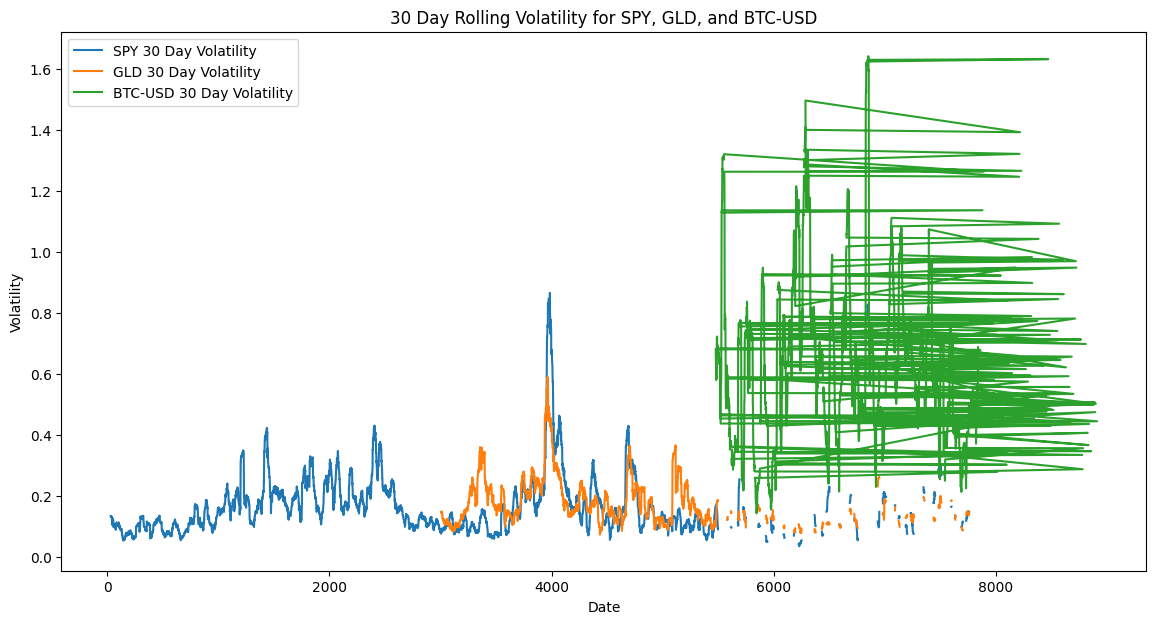

In [120]:
# Assuming 'Date' is set as the DataFrame index and the data is prepared
# Plot the '30 Day Volatility' columns
plt.figure(figsize=(14, 7))
merged_df['SPY_Vol_30'].plot(label='SPY 30 Day Volatility')
merged_df['GLD_Vol_30'].plot(label='GLD 30 Day Volatility')
merged_df['BTC_USD_Vol_30'].plot(label='BTC-USD 30 Day Volatility')

plt.title('30 Day Rolling Volatility for SPY, GLD, and BTC-USD')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

### Index Calculation